# Quicken Quickbooks Upgrade Assignment
- Rob's solutions

# 

# Imports

#### Standard library imports

In [1]:
import sys
sys.path.append("../")

import os
import itertools

#### Third party imports

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import metrics
import plotly.graph_objects as go
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#### Local application imports

In [3]:
%load_ext autoreload
%autoreload 2

from pkg_dir.config import *
from pkg_dir.src.utils import *
from pkg_dir.src.functions import *
from pkg_dir.src.parameters import *

# 

# Importing data

In [4]:
df = pd.read_csv('../pkg_dir/data/intuit.csv')

# 

# Data exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20000 non-null  int64  
 1   sex         20000 non-null  object 
 2   bizflag     20000 non-null  int64  
 3   zip         20000 non-null  int64  
 4   zip_bins    20000 non-null  int64  
 5   numords     20000 non-null  int64  
 6   dollars     20000 non-null  float64
 7   last        20000 non-null  int64  
 8   sincepurch  20000 non-null  int64  
 9   version1    20000 non-null  int64  
 10  owntaxprod  20000 non-null  int64  
 11  upgraded    20000 non-null  int64  
 12  res1        20000 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 2.0+ MB


In [6]:
df.describe()

,id,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1
count,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.244400,54350.2613,10.499000,2.079450,93.581000,15.779650,15.751400,0.208250,0.027100,0.215600,0.048050
std,5773.647028,0.429742,32776.4059,5.766755,1.246361,82.601398,9.527331,10.020435,0.406067,0.162379,0.411248,0.213877
min,1.000000,0.000000,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,0.000000,23451.0000,5.000000,1.000000,37.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,0.000000,55402.5000,10.500000,2.000000,71.000000,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.250000,0.000000,89018.7500,15.250000,3.000000,124.500000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000
max,20000.000000,1.000000,99999.0000,20.000000,5.000000,937.500000,36.000000,36.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
## Number of positive labels in results

mba263.tabulate(df['res1'])

,Name,Count,Frequency
0,0,19039,0.95195
1,1,961,0.04805


In [8]:
## Do all customers who upgraded have Quickbooks version 2?

df.groupby(
    [
        'upgraded',
        'version1',
    ]
).agg(
    cnt=('id', 'count')
)

cnt
upgraded version1       
0        0         11523
         1          4165
1        0          4312

# 

# Wrangling

##### Adding RFM variables

In [9]:
## RFM variables
num_tiles = 10
df['rec_ntile'] = mba263.ntile(df['last'], num_tiles)
df['freq_ntile'] = num_tiles - 1 - mba263.ntile(df['numords'], num_tiles)
df['mon_ntile'] = num_tiles - 1 - mba263.ntile(df['dollars'], num_tiles)

##### Generating dummy variables

###### Column: `sex`

In [10]:
df = pd.concat(
    [
        df,
        pd.get_dummies(df['sex'], prefix='sex', drop_first=True)
    ],
    axis=1
)

###### Column: `zip_bins`

In [11]:
df = pd.concat(
    [
        df,
        pd.get_dummies(df['zip_bins'], prefix='zip_bins', drop_first=True)
    ],
    axis=1
)

# 

# Modeling

## M1: Logistic regression

#### Model

In [12]:
dfm1 = df.copy()

In [13]:
## Defining label and features for the model

m1_l = ['res1']

m1_f = [
    # 'id',
    # 'sex',
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
    'freq_ntile',
    'rec_ntile',
    'mon_ntile',
]

In [14]:
m1 = mba263.logit(
    dfm1[m1_l],
    dfm1[m1_f]
)

Optimization terminated successfully.
         Current function value: 0.169968
         Iterations 8


#### Coefficients

In [15]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:                   res1   No. Observations:                20000
Model:                    Mba263Logit   Df Residuals:                    19966
Method:                           MLE   Df Model:                           33
Date:                Mon, 20 Mar 2023   Pseudo R-squ.:                  0.1181
Time:                        15:01:17   Log-Likelihood:                -3399.4
converged:                       True   LL-Null:                       -3854.7
Covariance Type:            nonrobust   LLR p-value:                5.851e-170
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.6956      0.795     -2.134      0.033      -3.253      -0.138
sex_F          -0.7973      0.628     -1.270      0.204      -2.027       0.433
sex_M          -0.6858      0.624     -1.100      0.272      -1.908       0.537
sex_U          -0.6835      0.632     -1.082      0.279      -1.921       0.554
bizflag        -0.0893      0.087     -1.021      0.307      -0.261       0.082
zip_bins_2     -2.0524      0.184    -11.132      0.000      -2.414      -1.691
zip_bins_3     -2.0346      0.186    -10.932      0.000      -2.399      -1.670
zip_bins_4     -2.1856      0.194    -11.239      0.000      -2.567      -1.804
zip_bins_5     -2.0072      0.181    -11.070      0.000      -2.363      -1.652
zip_bins_6     -2.1006      0.186    -11.266      0.000      -2.466      -1.735
zip_bins_7     -1.9662      0.181    -10.846      0.000      -2.321      -1.611
zip_bins_8     -2.6335      0.232    -11.349      0.000      -3.088      -2.179
zip_bins_9     -1.9694      0.177    -11.121      0.000      -2.316      -1.622
zip_bins_10    -1.7685      0.167    -10.580      0.000      -2.096      -1.441
zip_bins_11    -2.0985      0.185    -11.353      0.000      -2.461      -1.736
zip_bins_12    -1.6182      0.160    -10.097      0.000      -1.932      -1.304
zip_bins_13    -2.1778      0.192    -11.337      0.000      -2.554      -1.801
zip_bins_14    -2.3434      0.207    -11.309      0.000      -2.749      -1.937
zip_bins_15    -1.8677      0.174    -10.755      0.000      -2.208      -1.527
zip_bins_16    -2.2220      0.199    -11.175      0.000      -2.612      -1.832
zip_bins_17    -2.2019      0.195    -11.311      0.000      -2.583      -1.820
zip_bins_18    -1.8050      0.170    -10.619      0.000      -2.138      -1.472
zip_bins_19    -2.1772      0.191    -11.412      0.000      -2.551      -1.803
zip_bins_20    -2.0583      0.186    -11.041      0.000      -2.424      -1.693
numords         0.4332      0.110      3.925      0.000       0.217       0.650
dollars         0.0003      0.001      0.453      0.651      -0.001       0.001
last           -0.0147      0.030     -0.499      0.618      -0.073       0.043
sincepurch      0.0062      0.006      0.961      0.337      -0.006       0.019
version1        0.6704      0.141      4.753      0.000       0.394       0.947
owntaxprod      0.0804      0.189      0.425      0.671      -0.290       0.451
upgraded        0.8074      0.138      5.863      0.000       0.537       1.077
freq_ntile      0.1050      0.047      2.253      0.024       0.014       0.196
rec_ntile      -0.1225      0.096     -1.281      0.200      -0.310       0.065
mon_ntile      -0.0396      0.022     -1.773      0.076      -0.083       0.004
===============================================================================
"""

In [16]:
mba263.odds_ratios(m1)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
sex_F,0.450539,0.282769,1.943143,0.052,-0.098033,0.999111
sex_M,0.503677,0.314140,1.579943,0.114,-0.105753,1.113108
sex_U,0.504838,0.318857,1.552930,0.120,-0.113744,1.123420
bizflag,0.914599,0.079958,1.068084,0.285,0.759481,1.069716
zip_bins_2,0.128425,0.023677,36.811043,0.000,0.082491,0.174358
zip_bins_3,0.130733,0.024332,35.724944,0.000,0.083529,0.177937
zip_bins_4,0.112406,0.021860,40.603044,0.000,0.069997,0.154815
zip_bins_5,0.134362,0.024362,35.532268,0.000,0.087099,0.181624
zip_bins_6,0.122382,0.022819,38.460006,0.000,0.078113,0.166651
zip_bins_7,0.139992,0.025379,33.887258,0.000,0.090757,0.189226


#### Predictions

In [17]:
dfm1['m1_pred_prob'] = m1.predict(exog=dfm1[m1_f])

###### 

## M2: Neural network

#### Model

In [18]:
dfm2 = df.copy()

In [19]:
## Defining label and features for the model

m2_l = ['res1']

m2_f = [
    # 'id',
    # 'sex',
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
    'freq_ntile',
    'rec_ntile',
    'mon_ntile',
]

In [20]:
m2 = mba263.neural_network(
    dfm2[m2_l],
    dfm2[m2_f]
)

#### Coefficients

#### Predictions

In [21]:
dfm2['m2_pred_prob'] = m2.predict(dfm2[m2_f])

###### 

## M3: Logistic regression with regularization

#### Model

In [22]:
dfm3 = df.copy()

In [23]:
## Defining label and features for the model

m3_l = ['res1']

m3_f = [
    # 'id',
    # 'sex',
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
    'freq_ntile',
    'rec_ntile',
    'mon_ntile',
]

In [24]:
m3 = mba263.logit_reg(
    dfm3[m3_l],
    dfm3[m3_f],
    alpha=3
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17584212471183377
            Iterations: 244
            Function evaluations: 250
            Gradient evaluations: 244


#### Coefficients

In [25]:
m3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Mba263Logit
==================================================================
Model:              Mba263Logit      Pseudo R-squared: 0.114      
Dependent Variable: res1             AIC:              6893.2518  
Date:               2023-03-20 15:01 BIC:              7138.2599  
No. Observations:   20000            Log-Likelihood:   -3415.6    
Df Model:           30               LL-Null:          -3854.7    
Df Residuals:       19969            LLR p-value:      2.5005e-165
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     244.0000                                      
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
const          -1.7642    0.4904  -3.5975  0.0003  -2.7253  -0.8030
sex_F          -0.1085    0.0865  -1.2545  0.2097  -0.2780   0.0610
sex_M           0.0000       nan      nan     nan      nan      nan
sex_U           0.0000       nan      nan     nan      nan      nan
bizflag        -0.0910    0.0812  -1.1208  0.2624  -0.2501   0.0681
zip_bins_2     -1.5728    0.1828  -8.6032  0.0000  -1.9311  -1.2145
zip_bins_3     -1.5538    0.1843  -8.4321  0.0000  -1.9150  -1.1927
zip_bins_4     -1.6998    0.1917  -8.8693  0.0000  -2.0755  -1.3242
zip_bins_5     -1.5269    0.1801  -8.4790  0.0000  -1.8799  -1.1740
zip_bins_6     -1.6159    0.1845  -8.7568  0.0000  -1.9775  -1.2542
zip_bins_7     -1.4942    0.1801  -8.2987  0.0000  -1.8471  -1.1413
zip_bins_8     -2.1018    0.2224  -9.4494  0.0000  -2.5377  -1.6658
zip_bins_9     -1.4892    0.1763  -8.4471  0.0000  -1.8348  -1.1437
zip_bins_10    -1.3116    0.1677  -7.8198  0.0000  -1.6404  -0.9829
zip_bins_11    -1.6160    0.1831  -8.8241  0.0000  -1.9750  -1.2571
zip_bins_12    -1.1678    0.1616  -7.2273  0.0000  -1.4845  -0.8511
zip_bins_13    -1.6977    0.1896  -8.9533  0.0000  -2.0694  -1.3261
zip_bins_14    -1.8431    0.2024  -9.1065  0.0000  -2.2398  -1.4464
zip_bins_15    -1.4042    0.1734  -8.0982  0.0000  -1.7441  -1.0644
zip_bins_16    -1.7383    0.1954  -8.8968  0.0000  -2.1213  -1.3554
zip_bins_17    -1.7111    0.1917  -8.9248  0.0000  -2.0869  -1.3353
zip_bins_18    -1.3439    0.1702  -7.8980  0.0000  -1.6774  -1.0104
zip_bins_19    -1.6856    0.1883  -8.9532  0.0000  -2.0546  -1.3166
zip_bins_20    -1.5761    0.1844  -8.5450  0.0000  -1.9376  -1.2146
numords         0.2045    0.1088   1.8792  0.0602  -0.0088   0.4177
dollars         0.0004    0.0006   0.5704  0.5684  -0.0009   0.0016
last           -0.0261    0.0293  -0.8905  0.3732  -0.0835   0.0313
sincepurch      0.0093    0.0063   1.4673  0.1423  -0.0031   0.0217
version1        0.5550    0.1390   3.9930  0.0001   0.2826   0.8274
owntaxprod      0.0000       nan      nan     nan      nan      nan
upgraded        0.6984    0.1355   5.1532  0.0000   0.4328   0.9641
freq_ntile      0.0129    0.0458   0.2825  0.7776  -0.0768   0.1027
rec_ntile      -0.0819    0.0948  -0.8638  0.3877  -0.2677   0.1039
mon_ntile      -0.0367    0.0221  -1.6605  0.0968  -0.0800   0.0066
==================================================================

"""

#### Predictions

In [26]:
dfm3['m3_pred_prob'] = m3.predict(dfm3[m3_f])

###### 

## M4: Random forest

#### Model

In [27]:
dfm4 = df.copy()

In [28]:
## Defining label and features for the model

m4_l = ['res1']

m4_f = [
    # 'id',
    # 'sex',
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
    'freq_ntile',
    'rec_ntile',
    'mon_ntile',
]

In [29]:
m4 = mba263.random_forest(
    dfm4[m4_l],
    dfm4[m4_f],
    trees=500,
    leaf_nodes=15,
)

#### Coefficients

#### Predictions

In [30]:
dfm4['m4_pred_prob'] = m4.predict(dfm4[m4_f])

###### 

## M5: Logistic regression with regularization and interactions

#### Model

In [82]:
dfm5 = df.copy()

In [83]:
## Defining label and features for the model

m5_l = ['res1']

m5_f = [
    # 'id',
    # 'sex',
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    # 'zip',
    # 'zip_bins',
    'zip_bins_2',
    'zip_bins_3',
    'zip_bins_4',
    'zip_bins_5',
    'zip_bins_6',
    'zip_bins_7',
    'zip_bins_8',
    'zip_bins_9',
    'zip_bins_10',
    'zip_bins_11',
    'zip_bins_12',
    'zip_bins_13',
    'zip_bins_14',
    'zip_bins_15',
    'zip_bins_16',
    'zip_bins_17',
    'zip_bins_18',
    'zip_bins_19',
    'zip_bins_20',
    'numords',
    'dollars',
    'last',
    'sincepurch',
    'version1',
    'owntaxprod',
    'upgraded',
    'freq_ntile',
    'rec_ntile',
    'mon_ntile',
]

In [84]:
## Generating interactions among selected variables

### List of selected variables
m5_int = [
    'sex_F',
    'sex_M',
    'sex_U',
    'bizflag',
    'version1',
    'owntaxprod',
    'upgraded',
    'freq_ntile',
    'rec_ntile',
    'mon_ntile',
]

## List of tuples with all interaction excluding sex
m5_int = [
    x 
    for x 
    in itertools.combinations(m5_int, 2) 
    if
        x[0][:4] != x[1][:4] ## Excluding interactions between sex
]

## Adding all interactions to dataframe and list of features for the model
for x in m5_int:
    
    ### Dataframe
    dfm5[x[0] + '-&-' + x[1]] = dfm5[x[0]]*dfm5[x[1]]
    
    ### List of features
    m5_f.append(x[0] + '-&-' + x[1])

In [85]:
m5 = mba263.logit_reg(
    dfm5[m5_l],
    dfm5[m5_f],
    alpha=3
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17358077479794215
            Iterations: 444
            Function evaluations: 454
            Gradient evaluations: 444


#### Coefficients

In [86]:
mba263.odds_ratios(m5)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
sex_F,1.000000,NaN,NaN,NaN,NaN,NaN
sex_M,0.929779,0.180782,0.388430,0.698,0.579061,1.280497
sex_U,1.000000,NaN,NaN,NaN,NaN,NaN
bizflag,0.933024,0.216503,0.309354,0.757,0.513008,1.353040
zip_bins_2,0.209672,0.038702,20.420781,0.000,0.134590,0.284754
...,...,...,...,...,...,...
upgraded-&-rec_ntile,1.032337,0.030255,1.068810,0.285,0.973642,1.091032
upgraded-&-mon_ntile,1.000492,0.036793,0.013361,0.989,0.929113,1.071871
freq_ntile-&-rec_ntile,1.003241,0.004839,0.669813,0.503,0.993853,1.012630
freq_ntile-&-mon_ntile,1.008305,0.003905,2.126564,0.033,1.000729,1.015881


In [87]:
m5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Mba263Logit
=======================================================================
Model:                 Mba263Logit       Pseudo R-squared:  0.128      
Dependent Variable:    res1              AIC:               6838.3300  
Date:                  2023-03-20 15:51  BIC:               7304.6358  
No. Observations:      20000             Log-Likelihood:    -3360.2    
Df Model:              58                LL-Null:           -3854.7    
Df Residuals:          19941             LLR p-value:       1.6624e-169
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        444.0000                                        
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                   -1.4874   0.3262 -4.5594 0.0000 -2.1267 -0.8480
sex_F                    0.0000      nan     nan    nan     nan     nan
sex_M                   -0.0728   0.1944 -0.3745 0.7081 -0.4539  0.3083
sex_U                    0.0000      nan     nan    nan     nan     nan
bizflag                 -0.0693   0.2320 -0.2988 0.7651 -0.5241  0.3855
zip_bins_2              -1.5622   0.1846 -8.4634 0.0000 -1.9240 -1.2004
zip_bins_3              -1.5617   0.1857 -8.4109 0.0000 -1.9256 -1.1978
zip_bins_4              -1.6993   0.1931 -8.7991 0.0000 -2.0778 -1.3208
zip_bins_5              -1.5365   0.1816 -8.4622 0.0000 -1.8924 -1.1807
zip_bins_6              -1.6155   0.1862 -8.6772 0.0000 -1.9803 -1.2506
zip_bins_7              -1.5033   0.1819 -8.2626 0.0000 -1.8600 -1.1467
zip_bins_8              -2.1041   0.2243 -9.3812 0.0000 -2.5436 -1.6645
zip_bins_9              -1.5148   0.1783 -8.4945 0.0000 -1.8644 -1.1653
zip_bins_10             -1.3075   0.1693 -7.7254 0.0000 -1.6393 -0.9758
zip_bins_11             -1.6289   0.1850 -8.8052 0.0000 -1.9915 -1.2663
zip_bins_12             -1.1640   0.1633 -7.1281 0.0000 -1.4841 -0.8440
zip_bins_13             -1.7024   0.1911 -8.9074 0.0000 -2.0770 -1.3278
zip_bins_14             -1.8455   0.2040 -9.0478 0.0000 -2.2453 -1.4457
zip_bins_15             -1.4198   0.1750 -8.1113 0.0000 -1.7629 -1.0767
zip_bins_16             -1.7519   0.1969 -8.8960 0.0000 -2.1379 -1.3659
zip_bins_17             -1.7245   0.1935 -8.9137 0.0000 -2.1037 -1.3453
zip_bins_18             -1.3306   0.1718 -7.7435 0.0000 -1.6674 -0.9938
zip_bins_19             -1.6954   0.1902 -8.9134 0.0000 -2.0682 -1.3226
zip_bins_20             -1.5747   0.1859 -8.4696 0.0000 -1.9391 -1.2103
numords                  0.1077   0.0609  1.7678 0.0771 -0.0117  0.2271
dollars                  0.0000      nan     nan    nan     nan     nan
last                    -0.0298   0.0254 -1.1732 0.2407 -0.0795  0.0200
sincepurch               0.0099   0.0064  1.5557 0.1198 -0.0026  0.0224
version1                 1.4757   0.2184  6.7559 0.0000  1.0476  1.9038
owntaxprod               0.0029   0.5155  0.0055 0.9956 -1.0075  1.0132
upgraded                 0.8139   0.2595  3.1361 0.0017  0.3052  1.3226
freq_ntile               0.0000      nan     nan    nan     nan     nan
rec_ntile                0.0000      nan     nan    nan     nan     nan
mon_ntile               -0.1104   0.0618 -1.7868 0.0740 -0.2315  0.0107
sex_F-&-bizflag          0.0000      nan     nan    nan     nan     nan
sex_F-&-version1         0.1452   0.2180  0.6659 0.5055 -0.2821  0.5724
sex_F-&-owntaxprod       0.0000      nan     nan    nan     nan     nan
sex_F-&-upgraded         0.0000      nan     nan    nan     nan     nan
sex_F-&-freq_ntile       0.0147   0.0358  0.4106 0.6814 -0.0554  0.0848
sex_F-&-rec_ntile       -0.0352   0.0877 -0.4010 0.6884 -0.2072  0.1368
sex_F-&-mon_ntile       -0.0421   0.0571 -0.7370 0.4611 -0.1540  0.0698
sex_M-&-bizflag         -0.1478   0.1767 -0.8364 0.4029 -0.4942  0.1985
sex_M-&-version1 

#### Predictions

In [88]:
dfm5['m5_pred_prob'] = m5.predict(dfm5[m5_f])

###### 

## M6: RFM model

#### Model

In [117]:
dfm6 = df.copy()

In [118]:
## Defining label and features for the model

m6_l = ['res1']

m6_f = [
    # 'id',
    # 'sex',
    # 'sex_F',
    # 'sex_M',
    # 'sex_U',
    # 'bizflag',
    # 'zip',
    # 'zip_bins',
    # 'zip_bins_2',
    # 'zip_bins_3',
    # 'zip_bins_4',
    # 'zip_bins_5',
    # 'zip_bins_6',
    # 'zip_bins_7',
    # 'zip_bins_8',
    # 'zip_bins_9',
    # 'zip_bins_10',
    # 'zip_bins_11',
    # 'zip_bins_12',
    # 'zip_bins_13',
    # 'zip_bins_14',
    # 'zip_bins_15',
    # 'zip_bins_16',
    # 'zip_bins_17',
    # 'zip_bins_18',
    # 'zip_bins_19',
    # 'zip_bins_20',
    # 'numords',
    # 'dollars',
    # 'last',
    # 'sincepurch',
    # 'version1',
    # 'owntaxprod',
    # 'upgraded',
    'freq_ntile',
    'rec_ntile',
    'mon_ntile',
]

#### Predictions

In [119]:
## Defining RFM metric
dfm6['m6_pred_prob'] = mba263.get_means(
    dfm6['res1'], 
    dfm6['rec_ntile'].astype('str') + dfm6['freq_ntile'].astype('str') + dfm6['mon_ntile'].astype('str')
)

###### 

###### 

## Models compilation

In [134]:
## Models objects
models = {
    
    ## Logistic regression
    'm1': { 
        'df': dfm1,
        'label': m1_l,
        'features': m1_f,
        'model': m1,
    },
    
    ## Neural network
    'm2': { 
        'df': dfm2,
        'label': m2_l,
        'features': m2_f,
        'model': m2,
    },
    
    ## Logistic regression with regularization
    'm3': { 
        'df': dfm3,
        'label': m3_l,
        'features': m3_f,
        'model': m3,
    },
    
    ## Random forest
    'm4': {
        'df': dfm4,
        'label': m4_l,
        'features': m4_f,
        'model': m4,
    },
    
    ## Logistic regression with regularization and interactions
    'm5': {
        'df': dfm5,
        'label': m5_l,
        'features': m5_f,
        'model': m5,
    },
    
    ## RFM model
    'm6': {
        'df': dfm6,
        'label': m6_l,
        'features': m6_f,
        'model': 'No model saved',
    },
    
}

# 

# Results exploration

### Probability predictions distribution based on results

##### Model 1: Logistic regression

In [ ]:
fig = px.box(dfm1, x="res1", y=round(dfm1['m1_pred_prob'], 4))
fig.show()

In [ ]:
fig = px.histogram(
    dfm1, 
    x="m1_pred_prob", 
    color="res1", 
    nbins=100,
    marginal='rug',
    histnorm='probability',
    barmode='overlay'
)

fig.show()

##### Model 2: Neural network

In [ ]:
fig = px.box(dfm2, x="res1", y=round(dfm2['m2_pred_prob'], 4))
fig.show()

In [ ]:
fig = px.histogram(
    dfm2, 
    x="m2_pred_prob", 
    color="res1", 
    nbins=100,
    marginal='rug',
    histnorm='probability',
    barmode='overlay'
)

fig.show()

##### Model 4: Random forest

In [ ]:
fig = px.box(dfm4, x="res1", y=round(dfm4['m4_pred_prob'], 4))
fig.show()

In [ ]:
fig = px.histogram(
    dfm4, 
    x="m4_pred_prob", 
    color="res1", 
    nbins=100,
    marginal='rug',
    histnorm='probability',
    barmode='overlay'
)

fig.show()

##### Model 6: RFM

In [ ]:
fig = px.box(dfm6, x="res1", y=round(dfm6['m6_pred_prob'], 6))
fig.show()

In [ ]:
fig = px.histogram(
    dfm6, 
    x="m6_pred_prob", 
    color="res1", 
    nbins=100,
    marginal='rug',
    histnorm='probability',
    barmode='overlay'
)

fig.show()

### Gains

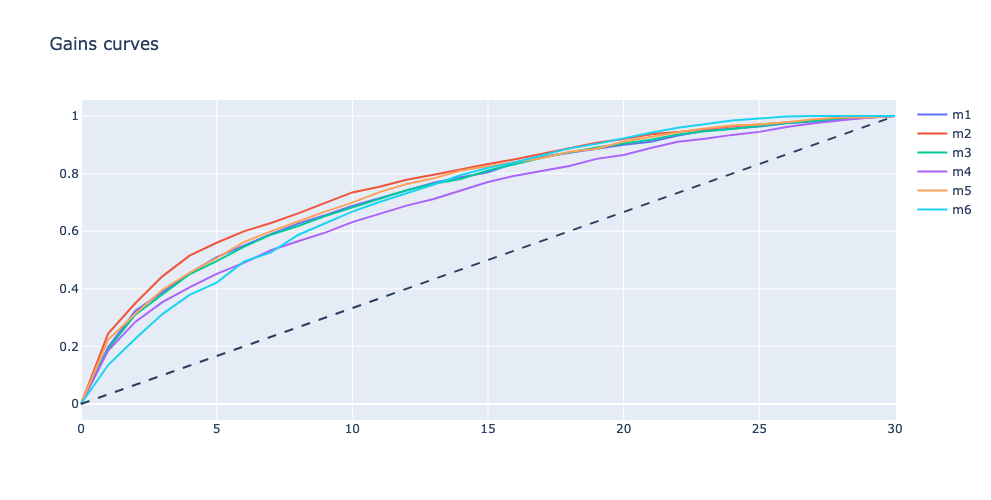

In [123]:
fig = go.Figure()


fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=30, y0=0, y1=1
)


for model_key in models:
    
    ## Variables definition
    mx_info = models[model_key]
    dfx = mx_info['df']
    
    ## Gain calculation
    mx_gain = mba263.gain(dfx['res1'], dfx[model_key + '_pred_prob'], bins=30)

    fig.add_trace(
        go.Scatter(
            x=np.linspace(0, 30, num=mx_gain.shape[0]), 
            y=mx_gain,
            mode='lines',
            name=model_key
        )
    )
    

fig.update_layout(
    width=700, height=500,
    title='Gains curves'
)
    
fig.show()

###### 

### Profit estimation


##### Calculating profits for each model at different thresholds

In [182]:
## Profit dataframe for various thresholds
thd_cuts = 100
dfprofit = pd.DataFrame(np.linspace(0, 1, num=thd_cuts))
dfprofit.rename(columns={0: 'threshold'}, inplace=True)

In [ ]:
for model_key in models:
    
    print(model_key + '...')
    
    ## Defining variables
    _model = models[model_key]['model']
    _df = models[model_key]['df']
    _features = _df[models[model_key]['features']]
    _label = _df[models[model_key]['label']]
    
    
    ## Obtaining key metrics for all cutoffs
    
    ### Condition to define how to make the predictions for a particular threshold
    if model_key == 'm6':
        
        #### Calculations for model 6
        dfprofit[model_key] = dfprofit['threshold'].apply(
            lambda x: metrics.confusion_matrix(
                y_true=_label,
                y_pred=(
                    mba263.get_means(
                        _df['res1'], 
                        _df['rec_ntile'].astype('str') + _df['freq_ntile'].astype('str') + _df['mon_ntile'].astype('str')
                    )/2 >= x
                )*1,
            ).ravel()
        )
        
    else:
        
        #### Calculations for model 6
        dfprofit[model_key] = dfprofit['threshold'].apply(
            lambda x: metrics.confusion_matrix(
                y_true=_label,
                y_pred=(_model.predict(_features)/2 >= x)*1,
            ).ravel()
        )
        
    
    ## Desaggregating results into columns
    dfprofit[
        [
            model_key + '_tn',  
            model_key + '_fp',  
            model_key + '_fn',  
            model_key + '_tp',
        ]
    ] = pd.DataFrame(dfprofit[model_key].tolist(), index=dfprofit.index)
    dfprofit.drop(model_key, axis=1, inplace=True)
    
    ## Adjusting the true positives and false positives to account for the 50% less response rate due to second wave
    ### Cutting the true positives by half
    dfprofit[model_key + '_tp'] = dfprofit[model_key + '_tp']/2
    ### Adding the cutted half to the false positive
    dfprofit[model_key + '_fp'] = dfprofit[model_key + '_fp'] + dfprofit[model_key + '_tp']/2
    
    ## Adding some other model metrics
    dfprofit[model_key + '_prc'] = dfprofit[model_key + '_tp']/(dfprofit[model_key + '_tp'] + dfprofit[model_key + '_fp'])
    dfprofit[model_key + '_rcl'] = dfprofit[model_key + '_tp']/(dfprofit[model_key + '_tp'] + dfprofit[model_key + '_fn'])
    
    ## Calculating estimated profit
    dfprofit[model_key + '_profit'] = dfprofit[model_key + '_tp']*(60 - 1.41) - dfprofit[model_key + '_fp']*1.41
    
print('end!')

m1...
m2...
m3...
m4...
m5...
m6...


##### Visualizing results

In [ ]:
dfprofit

In [ ]:
fig = go.Figure()

for model_key in models:

    fig.add_trace(
        go.Scatter(
            x=dfprofit['threshold'], 
            y=dfprofit[model_key + '_profit'],
            mode='lines',
            name=model_key
        )
    )
    
fig.update_layout(
    width=700, height=500,
    title='Potential profit at various cutoffs',
    xaxis_title='Predicted probability cutoff',
    yaxis_title='Expected profit',
)
    
fig.show()

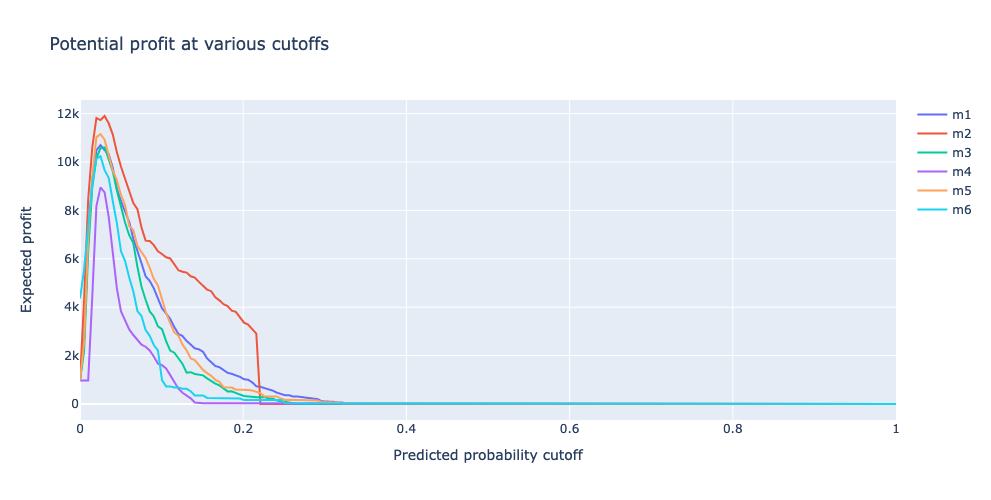

In [162]:
fig = go.Figure()

for model_key in models:

    fig.add_trace(
        go.Scatter(
            x=dfprofit['threshold'], 
            y=dfprofit[model_key + '_profit'],
            mode='lines',
            name=model_key
        )
    )
    
fig.update_layout(
    width=700, height=500,
    title='Potential profit at various cutoffs',
    xaxis_title='Predicted probability cutoff',
    yaxis_title='Expected profit',
)
    
fig.show()

##### Obtaining best of each model

In [175]:
## Creating base dataframe (with benchmark) to store results
dfprofit_max = pd.DataFrame(
    columns=['thd', 'tn', 'fp', 'fn', 'tp', 'prc', 'rcl', 'profit'],
    data=dfprofit.loc[
        dfprofit['threshold'] == 0,
        [
            col 
            for col 
            in dfprofit.columns 
            if (
                'm1' in col
                or
                'threshold' in col
            )
        ]
    ].values,
    index=['benchmark'],
)


##Adding worst possible model
_tn = 0
_fp = ((df['res1'] == 0)*1).sum() + ((df['res1'] == 1)*1).sum()/2
_fn = ((df['res1'] == 1)*1).sum()/2
_tp = 0
dfprofit_max.loc['m_worst', :] = [
    np.nan, ## thd
    _tn,
    _fp, ## fp
    _fn, ## fn
    _tp, ## tp
    _tp/(_tp + _fp), ## prc -> tp/(tp + fp)
    _tp/(_tp + _fn), ## rcl -> tp/(tp + fn)
    _tp*(60 - 1.41) - 0*1.41, ## profit
]

## Adding best possible model
_tn = ((df['res1'] == 0)*1).sum() + ((df['res1'] == 1)*1).sum()/2
_fp = 0
_fn = 0
_tp = ((df['res1'] == 1)*1).sum()/2
dfprofit_max.loc['m_best', :] = [
    np.nan, ## thd
    _tn,
    _fp, ## fp
    _fn, ## fn
    _tp, ## tp
    _tp/(_tp + _fp), ## prc -> tp/(tp + fp)
    _tp/(_tp + _fn), ## rcl -> tp/(tp + fn)
    _tp*(60 - 1.41) - 0*1.41, ## profit
]


## Finding best results for each model
for model_key in models:
    
    mr = dfprofit[model_key + '_profit'] == dfprofit[model_key + '_profit'].max()
    rc = [
        col 
        for col 
        in dfprofit.columns 
        if 
            model_key in col
            or
            'threshold' in col
    ]

    dfprofit_max.loc[model_key, :] = dfprofit.loc[mr, rc].values

In [176]:
dfprofit_max

,thd,tn,fp,fn,tp,prc,rcl,profit
benchmark,0.000000,0.0,19279.25,0.0,480.5,0.024317,1.000000,968.7525
m_worst,NaN,0.0,19519.50,480.5,0.0,0.000000,0.000000,0.0000
m_best,NaN,19519.5,0.00,0.0,480.5,1.000000,1.000000,28152.4950
m1,0.025126,13962.0,5231.25,344.0,308.5,0.055688,0.472797,10698.9525
m2,0.030151,15555.0,3629.25,380.0,290.5,0.074112,0.433259,11903.1525
m3,0.030151,14781.0,4401.50,387.0,287.0,0.061214,0.425816,10609.2150
m4,0.025126,13381.0,5804.25,376.0,292.5,0.047976,0.437547,8953.5825
m5,0.025126,13936.0,5261.50,327.0,317.0,0.056825,0.492236,11154.3150
m6,0.025126,12464.0,6743.50,287.0,337.0,0.047596,0.540064,10236.4950


In [180]:
dfprofit_max['check'] = dfprofit_max.loc[:, ['tn', 'fp', 'fn','tp']].sum(axis=1)
dfprofit_max

,thd,tn,fp,fn,tp,prc,rcl,profit,check
benchmark,0.000000,0.0,19279.25,0.0,480.5,0.024317,1.000000,968.7525,19759.75
m_worst,NaN,0.0,19519.50,480.5,0.0,0.000000,0.000000,0.0000,20000.00
m_best,NaN,19519.5,0.00,0.0,480.5,1.000000,1.000000,28152.4950,20000.00
m1,0.025126,13962.0,5231.25,344.0,308.5,0.055688,0.472797,10698.9525,19845.75
m2,0.030151,15555.0,3629.25,380.0,290.5,0.074112,0.433259,11903.1525,19854.75
m3,0.030151,14781.0,4401.50,387.0,287.0,0.061214,0.425816,10609.2150,19856.50
m4,0.025126,13381.0,5804.25,376.0,292.5,0.047976,0.437547,8953.5825,19853.75
m5,0.025126,13936.0,5261.50,327.0,317.0,0.056825,0.492236,11154.3150,19841.50
m6,0.025126,12464.0,6743.50,287.0,337.0,0.047596,0.540064,10236.4950,19831.50


In [148]:
dfprofit_max

,thd,tn,fp,fn,tp,prc,rcl,profit
benchmark,0.000000,240.25,19039.0,0.0,480.5,0.024616,1.000000,1307.505
m_worst,NaN,0.00,19039.0,961.0,0.0,0.000000,0.000000,-26844.990
m_best,NaN,19039.00,0.0,0.0,961.0,1.000000,1.000000,56304.990
m1,0.045226,13375.50,5827.0,307.0,327.0,0.053136,0.515773,10942.860
m2,0.045226,13846.25,5361.0,288.0,336.5,0.059061,0.538831,12156.525
m3,0.060302,14924.50,4258.0,387.0,287.0,0.063146,0.425816,10811.550
m4,0.055276,14825.50,4344.0,439.0,261.0,0.056678,0.372857,9166.950
m5,0.050251,14094.50,5103.0,327.0,317.0,0.058487,0.492236,11377.800
m6,0.045226,12119.00,7095.0,261.0,350.0,0.047011,0.572831,10502.550


###### 

### Precision recall metrics

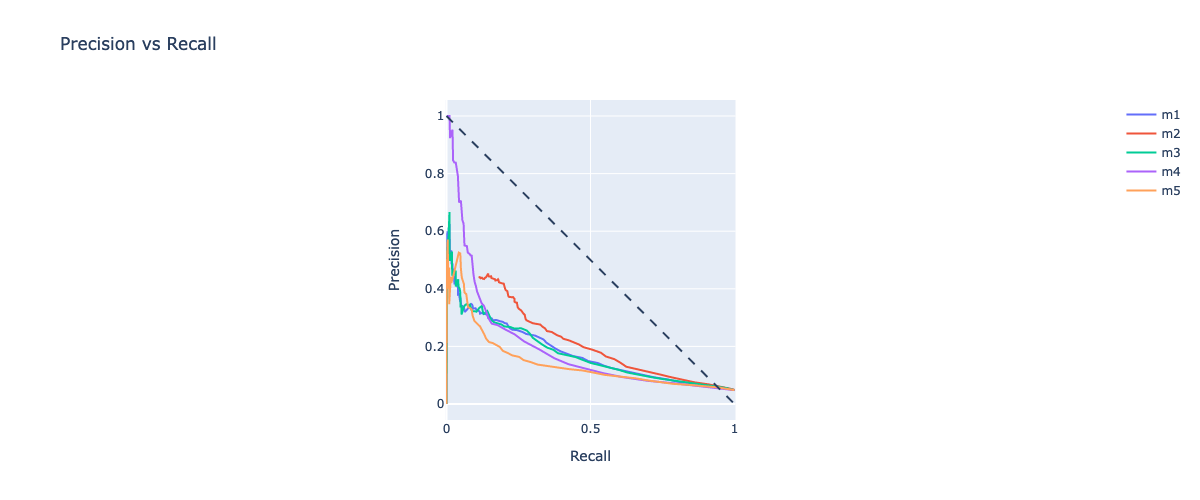

In [52]:
fig = go.Figure()

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)


for model_key in models:
    
    fig.add_trace(
        go.Scatter(
            x=dfprofit[model_key + '_rcl'], 
            y=dfprofit[model_key + '_prc'],
            mode='lines',
            name=model_key
        )
    )
    

fig.update_layout(
    title='Precision vs Recall',
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=500, height=500,
)

fig.show()

# 

# Campaign output

###### 

### Compiling results of each model

In [69]:
## Defining threshold as twice the minimum required based on information provided by the case
min_thd = 0.0235*2

## Dataframe where the results will be stored
dfres = df.loc[
    :, 
    [
        col
        for col
        in df.columns
        if 
            'res1' not in col
            and
            'sex_' not in col
            and
            'zip_bins_' not in col
    ] + ['res1']
].copy()


## Adding the best classification of each model
for model in models:
    
    dfx = models[model]['df']
    
    dfres[model + '_pred_prob'] = dfx[model + '_pred_prob']
    
    # dfres[model + '_pred'] = (dfx[model + '_pred_prob'] > dfprofit_max.loc[dfprofit_max.index == model, 'thd'].tolist()[0])*1
    dfres[model + '_pred'] = (dfx[model + '_pred_prob'] > min_thd)*1

In [54]:
mr1 = dfres['m2_pred'] == 1

prob_x = dfres.loc[mr1, ['m2_pred_prob']].mean().tolist()[0]
cust_x = dfres.loc[:, ['m2_pred']].sum().tolist()[0]

In [55]:
cust_x*(60*prob_x/2 - 1.41)

11543.422269585904

###### 

### Understanding the customer based on results

##### Upgraded history

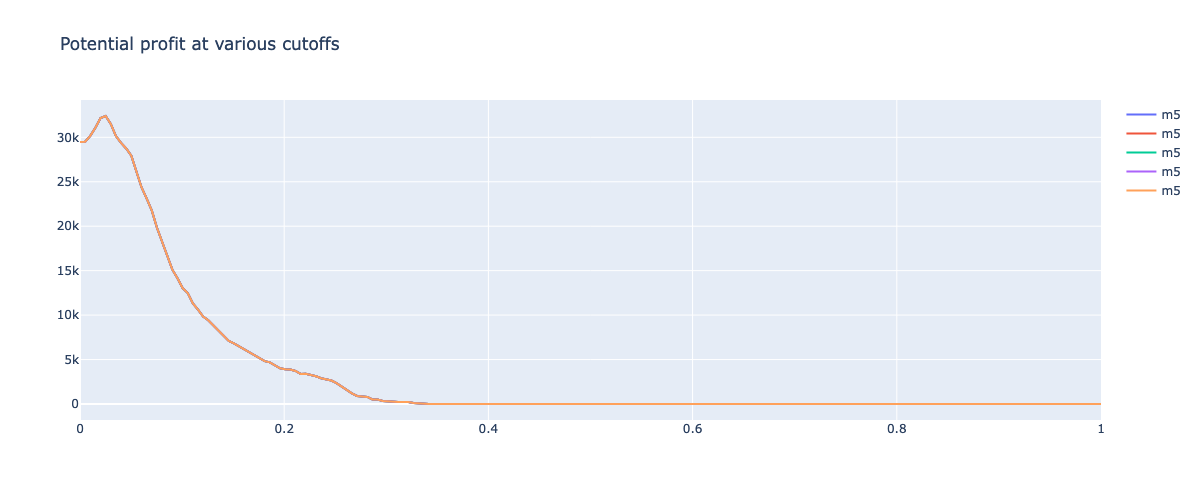

In [56]:
fig = go.Figure()

for res in models:

    fig.add_trace(
        go.Scatter(
            x=dfprofit['threshold'], 
            y=dfprofit[model_key + '_profit'],
            mode='lines',
            name=model_key
        )
    )
    
fig.update_layout(
    width=700, height=500,
    title='Potential profit at various cutoffs'
)
    
fig.show()

##### Business flags

In [57]:
dfres

,id,sex,bizflag,zip,zip_bins,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,rec_ntile,freq_ntile,mon_ntile,res1,m1_pred_prob,m1_pred,m2_pred_prob,m2_pred,m3_pred_prob,m3_pred,m4_pred_prob,m4_pred,m5_pred_prob,m5_pred
0,1,U,1,99999,20,1,129.5,11,1,0,0,0,3,9,2,0,0.023797,0,0.037983,0,0.025045,0,0.037293,0,0.024910,0
1,2,U,1,99999,20,2,65.0,4,14,0,0,0,1,5,5,0,0.031992,0,0.043117,0,0.040134,0,0.050207,1,0.053869,1
2,3,U,1,99999,20,1,24.5,13,36,1,0,0,3,9,8,0,0.042119,0,0.088797,1,0.043484,0,0.044924,0,0.037795,0
3,4,U,1,99999,20,1,80.5,5,19,1,0,0,1,9,4,0,0.063426,1,0.073850,1,0.062398,1,0.064222,1,0.035676,0
4,5,U,1,99999,20,1,111.0,14,7,0,0,0,4,9,2,0,0.020859,0,0.035455,0,0.022474,0,0.033730,0,0.025357,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,M,0,99824,20,4,58.0,8,19,0,0,1,2,1,5,0,0.097827,1,0.056026,1,0.102455,1,0.086556,1,0.080085,1
19996,19997,M,0,99835,20,1,22.0,17,2,0,0,0,5,9,8,0,0.014459,0,0.026633,0,0.015677,0,0.029247,0,0.022547,0
19997,19998,M,0,99835,20,1,29.5,12,14,0,0,0,3,9,8,0,0.021306,0,0.045379,0,0.023398,0,0.037511,0,0.035867,0
19998,19999,M,0,99901,20,2,111.5,19,22,0,0,1,6,5,2,0,0.040413,0,0.055522,1,0.048095,1,0.040722,0,0.080305,1


###### 

### Final formatting to export results

In [58]:
filename = 'JackP_TomV_SebastianR_RobertoP.csv'

In [59]:
## Removing features from dataframe
dfresf = dfres.loc[:, ['id', 'res1'] + [col for col in dfres.columns if '_pred' in col]].copy()

In [60]:
## Defining criteria to select final result

### Selecting results from model with best estimated performance
dfresf['target'] = dfresf.apply(lambda x: 0 if x['res1'] == 1 else x['m2_pred'], axis=1)
dfresf.loc[:, ['id', 'target']].to_csv(filename)

# 

# *Notes*

- TP: customers contacted that upgraded
- FP: customers contacted that didn't upgraded
- TN: customers not contacted that woudn't updgrade
- FN: customers not contacted that would upgrade

Notes on calculating profits

Calculate the best threshold to define a category and estimate values accordingly
- Precision (Response ratio): TP/(TP + FP)
- Graph
    - y: response ratio; 
    - x: cutoff
- Profit (observed)
    - TP*(60 - 1.41) - FP*1.41
    - TP*60 - TP*1.41 - FP*1.41
    - TP*60 - 1.41*(TP + FP)
- Profit (strict)
    - TP*(60 - 1.41) + TN*1.41 - FP*1.41 - FN*60
    - TP*60 - TP*1.41 + TN*1.41 - FP*1.41 - FN*60
    - 1.41*(TN - TP - FP) + 60*(TP - FN)

#### Validating the break even response

In [61]:
60*100*0.0235 - 100*1.41

0.0

In [62]:
(100)*(60*x - 1.41) = 0

SyntaxError: cannot assign to operator (3869230229.py, line 1)

TP + FP

$$
profit = 60*rr - 1.41
$$

In [ ]:
1.41/(60)

#### Validating the income generated by first wave

In [ ]:
cust_tot = 801821

#### Plotly express histogram documentation

histnorm: str (default `None`)
    One of `'percent'`, `'probability'`, `'density'`, or `'probability
    density'` If `None`, the output of `histfunc` is used as is. If
    `'probability'`, the output of `histfunc` for a given bin is divided by
    the sum of the output of `histfunc` for all bins. If `'percent'`, the
    output of `histfunc` for a given bin is divided by the sum of the
    output of `histfunc` for all bins and multiplied by 100. If
    `'density'`, the output of `histfunc` for a given bin is divided by the
    size of the bin. If `'probability density'`, the output of `histfunc`
    for a given bin is normalized such that it corresponds to the
    probability that a random event whose distribution is described by the
    output of `histfunc` will fall into that bin.

---

---